# **Support Vector Boundary**




Isotropic data generator documentation [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs) \
Support vector classifier documentation [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

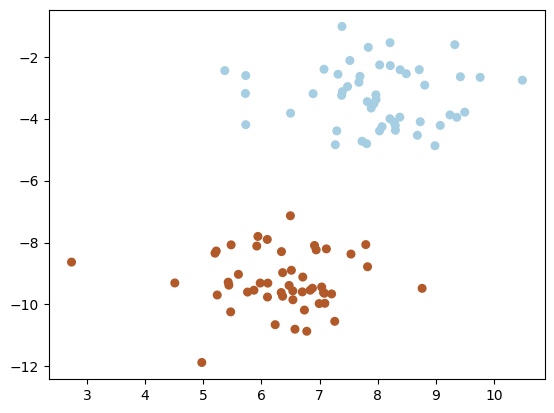

In [2]:
# we create 40 separable points
X, y = make_blobs(n_samples = 100 , centers = 2 , random_state = 6)
plt.scatter( X[:, 0] , X[:, 1] , c=y , s=30, cmap=plt.cm.Paired)

In [3]:
clf = svm.SVC(kernel = "linear", random_state = 2 )
clf.fit(X,y)

SVC(kernel='linear', random_state=2)

In [5]:
offset = 0.5
h_min, h_max = X[:,0].min()-offset, X[:, 0].max()+offset
v_min, v_max = X[:,1].min()-offset, X[:, 1].max()+offset


# Crear el grid de las fronteras de decision
h_grid, v_grid = np.meshgrid(np.linspace( h_min , h_max , 100), np.linspace( v_min , v_max , 100))

# Predecir los valores del grid
predictions = clf.decision_function( np.c_[h_grid.ravel(), v_grid.ravel()] )
print (predictions.shape)

# Encajar las predicciones al tamaño del grid
pred_grid = predictions.reshape( h_grid.shape)
print (pred_grid.shape)

(10000,)
(100, 100)


ValueError: 'c' argument has 100 elements, which is inconsistent with 'x' and 'y' with size 150.

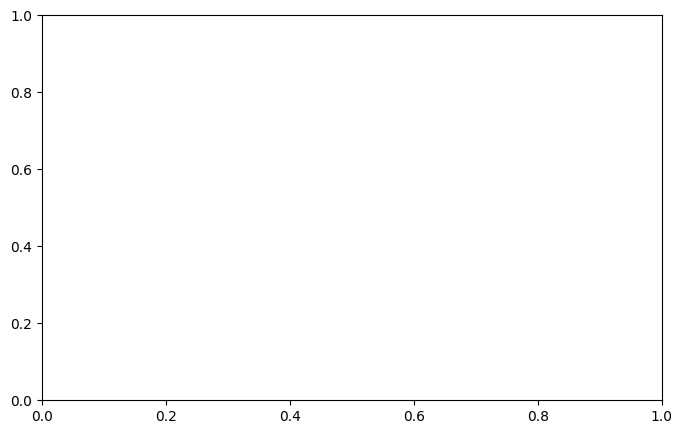

In [15]:
_, ax = plt.subplots (figsize=(8,5))
ax.scatter( X[:, 0] , X[:, 1] , c = y , s = 30, cmap = plt.cm.Paired)

# plot decision boundary and margins
ax.contour( h_grid , v_grid , pred_grid , colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')

# ax.set_xlim(x_grid.min()-.1, x_grid.max()+.1)
# ax.set_ylim(y_grid.min()-.1, y_grid.max()+.1)

ax.set_xticks(())
ax.set_yticks(())

## In real data

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_iris

(150, 2) (100,) ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


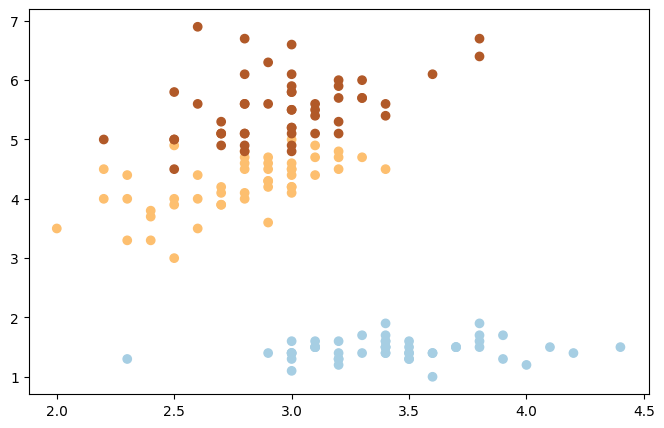

In [13]:
# import some data to play with
iris = load_iris()
X = iris.data[:, 1:3]  # Pick 2 features
Y = iris.target

feature_names = iris.feature_names
print(X.shape, y.shape, feature_names)

_, ax = plt.subplots(figsize = (8,5))
ax.scatter(X[:, 0], X[:, 1], c=Y, cmap="Paired")

In [14]:
# Create an instance of SVM and fit the data.
clf = SVC(kernel = "linear", random_state=2)
clf.fit( X , Y )

SVC(kernel='linear', random_state=2)

In [16]:
# Plot decision boundaries
offset = 0.5
h_min, h_max = X[:,0].min()-offset, X[:, 0].max()+offset
v_min, v_max = X[:,1].min()-offset, X[:, 1].max()+offset


# Crear el grid de las fronteras de decision
h_grid, v_grid = np.meshgrid(np.linspace( h_min , h_max , 100), np.linspace( v_min , v_max , 100))

# Predecir los valores del grid
pred_grid = clf.predict( np.c_[h_grid.ravel(), v_grid.ravel()] )
print (pred_grid.shape)

# Encajar las predicciones al tamaño del grid
pred_grid = pred_grid.reshape( h_grid.shape)
print (pred_grid.shape)

(10000,)
(100, 100)


[]

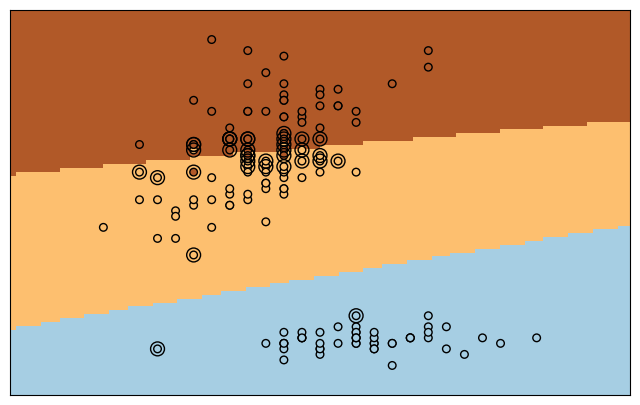

In [20]:
sp = clf.support_vectors_
_, ax = plt.subplots (figsize=(8,5))

ax.pcolormesh(h_grid, v_grid, pred_grid, cmap="Paired")
ax.scatter( X[:, 0] , X[:, 1] , c = Y , edgecolors="k", s = 30, cmap = "Paired")

# plot decision boundary and margins
# ax.contour( h_grid , v_grid , pred_grid , colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# plot support vectors
ax.scatter(sp[:, 0], sp[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')

# ax.set_xlim(x_grid.min()-.1, x_grid.max()+.1)
# ax.set_ylim(y_grid.min()-.1, y_grid.max()+.1)

ax.set_xticks(())
ax.set_yticks(())